In [1]:
# np.sum(abs(frame[330:334, 140:260].astype(int)-red_box.astype(int))) <= 40000
import numpy as np
import cv2
from matplotlib import pyplot as plt

right score:  1


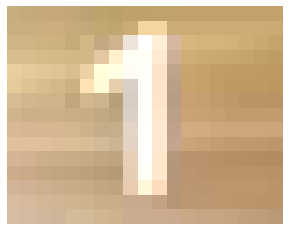


right score:  2


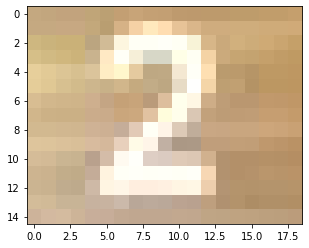









right score:  3


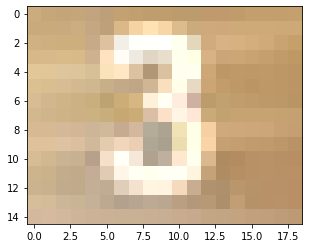


right score:  4


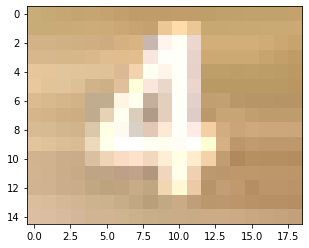


right score:  5


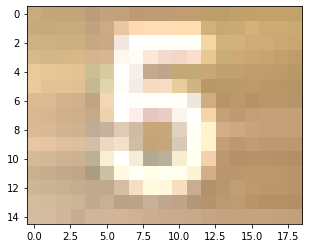



right score:  6


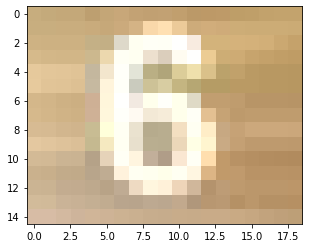


right score:  7


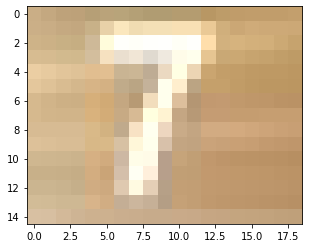



right score:  8


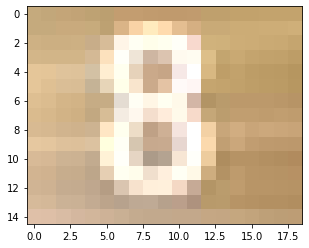


right score:  9


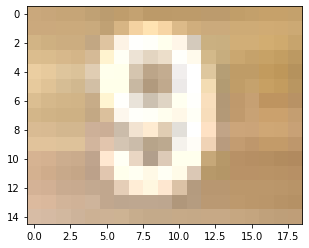


right score:  10


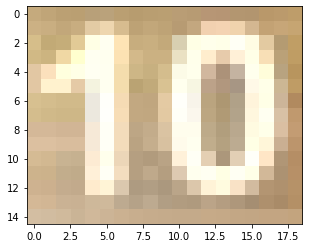


right score:  11


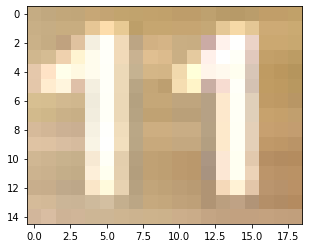


right score:  12


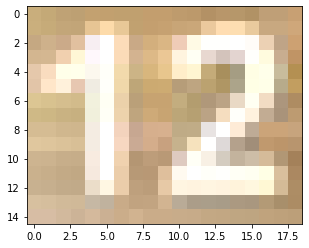


right score:  13


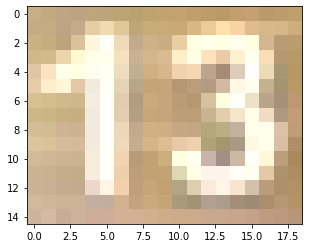




right score:  14


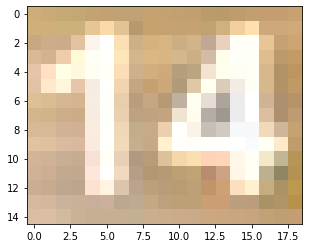


right score:  15


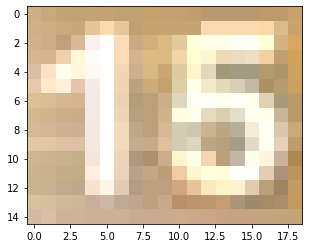

In [15]:
# COMPARE TO LAST ALGORITHM
plt.axis("off")


full_vid_location = "../videos-full/seoul-2019-gp/seoul-2019-gp-1.mp4"
cap = cv2.VideoCapture(full_vid_location)
endpoint = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

ret, frame = cap.read()

left_score = right_score = 0

left_last_frame = frame[310:310+15, 265:265+19].astype(int)
right_last_frame = frame[310:310+15, 356:356+19].astype(int)

left_cur_frame = left_last_frame
right_cur_frame = right_last_frame

score_dim_x, score_dim_y = 19, 15

path_left = "./left-score-download/"
path_right = "./right-score-download/"

cv2.imwrite(path_left + str(left_score) + ".png", left_cur_frame)
cv2.imwrite(path_right + str(right_score) + ".png", right_cur_frame)

for frame_num in range(0, endpoint):
    if frame_num % 100 is 0:
        cap.set(1, frame_num)
        ret, frame = cap.read()

        # Lets just deal with left touches right now

        left_last_frame = left_cur_frame
        left_cur_frame = frame[310:310+15, 265:265+19].astype(int)

        right_last_frame = right_cur_frame
        right_cur_frame = frame[310:310+15, 356:356+19].astype(int)

        left_touch = np.sum(abs(left_cur_frame - left_last_frame))
        right_touch = np.sum(abs(right_cur_frame - right_last_frame))
        threshold = 6000

        # plt.imshow(left_cur_frame)
        # plt.show()


        if left_touch > threshold:
            # plt.axis("off")
            # left_score += 1
            # print("left score: ", left_score)
            # cv2.imwrite(path_left + str(left_score) + ".png", left_cur_frame)
            # plt.imshow(left_cur_frame)
            # plt.show()
            # plt.axis("off")
            # plt.imshow(left_last_frame)
            # plt.show()
            print()
        elif right_touch > threshold:
            right_score += 1
            print("right score: ", right_score)
            plt.imshow(right_cur_frame)
            plt.show()
            cv2.imwrite(path_right + str(right_score) + ".png", right_cur_frame)
            print()


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [11]:
# LOAD PICS LIST (hashmap instead?)
left_pics = [cv2.imread("./utils/left-score/{}.png".format(i)) for i in range(0, 16)]
right_pics = [cv2.imread("./utils/right-score/{}.png".format(i)) for i in range(0, 16)]
# plt.imshow(left_pics[15])
# plt.show()
# right_pics = [16]
# for i in range(0, 16):
#     left_pics[i] = cv2.imread("./utils/left-score/{}.png".format(i))
#     right_pics[i] = cv2.imread("./utils/right-score/{}.png".format(i))

In [27]:
def compare_pics(reference, tester):
    return np.sum(abs(reference - tester))

# Up to caller to pass in correct pics dictionary and frame
# What if scores increment by more than 1 at time?
def score(current_score, pics, frame):
    min_diff = 100000
    score = -1
    for i in range(current_score - 1, current_score + 2):
        if i < 0 or i > 15:
            continue
        test_pic = pics[i]
        diff = compare_pics(frame, test_pic)
        if diff < min_diff:
            min_diff = diff
            score = i
    
    return score


In [28]:
# Returns true if there's a difference greater than threshold

# COMPARE TO BEFORE AND AFTER ALGORITHM

full_vid_location = "../videos-full/seoul-2019-gp/seoul-2019-gp-0.mp4"
# full_vid_location = "../videos-cut/moscow-2019-gp-CUT/moscow-2019-gp-0-7[6:5].mp4"
cap = cv2.VideoCapture(full_vid_location)
endpoint = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

left_score = right_score = 0

for frame_num in range(0, endpoint):
    if frame_num % 50 is 0:
        cap.set(1, frame_num)
        ret, frame = cap.read()

        # THIS SECTION TRANSFERS OVER
        left_frame = frame[310:310+15, 265:265+19].astype(int)
        right_frame = frame[310:310+15, 356:356+19].astype(int)

        og_left = left_score
        og_right = right_score

        left_score = score(left_score, left_pics, left_frame)
        right_score = score(right_score, right_pics, right_frame)

        if og_left != left_score or og_right != right_score:
            print(left_score, " : ", right_score)

        # THIS SECTION TRANSFERS OVER




        



0  :  1
1  :  1
2  :  1
2  :  2
3  :  2
3  :  3
4  :  2
5  :  2
5  :  3
5  :  4
6  :  4
6  :  5
7  :  5
7  :  6
8  :  6
9  :  6
10  :  6
10  :  7
11  :  7
11  :  8
12  :  8
13  :  8
14  :  8
13  :  9
14  :  9
14  :  10
15  :  10
